<a href="https://colab.research.google.com/github/yuguerten/traffic_prediction_using_CNN/blob/master/Traffic_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Project Description**

**Context**
Traffic congestion is rising in cities around the world. Contributing factors include expanding urban populations, aging infrastructure, inefficient and uncoordinated traffic signal timing, and a lack of real-time data.

The impacts are significant. Traffic data and analytics company INRIX estimates that traffic congestion cost U.S. commuters $305 billion in 2017 due to wasted fuel, lost time, and the increased cost of transporting goods through congested areas. Given the physical and financial limitations around building additional roads, cities must use new strategies and technologies to improve traffic conditions.

**Content**
This dataset contains 48.1k (48120) observations of the number of vehicles each hour in four different junctions:
1. DateTime
2. Junction
3. Vehicles
4. ID

**About the Data**
The sensors on each of these junctions were collecting data at different times, hence you will see traffic data from different time periods. Some of the junctions have provided limited or sparse data requiring thoughtfulness when creating future projections.
 https://www.kaggle.com/datasets/fedesoriano/traffic-prediction-dataset

---


In [84]:
import pandas as pd

In [147]:
traffic_data = pd.read_csv('traffic.csv',encoding='UTF-8')

In [86]:
traffic_data.head()

,DateTime,Junction,Vehicles,ID
0,2015-11-01 00:00:00,1,15,20151101001
1,2015-11-01 01:00:00,1,13,20151101011
2,2015-11-01 02:00:00,1,10,20151101021
3,2015-11-01 03:00:00,1,7,20151101031
4,2015-11-01 04:00:00,1,9,20151101041


In [87]:
traffic_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48120 entries, 0 to 48119
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   DateTime  48120 non-null  object
 1   Junction  48120 non-null  int64 
 2   Vehicles  48120 non-null  int64 
 3   ID        48120 non-null  int64 
dtypes: int64(3), object(1)
memory usage: 1.5+ MB


In [88]:
traffic_data['Junction'].unique()

array([1, 2, 3, 4])

In [89]:
traffic_viz = traffic_data.copy()

**Daily traffic recorded during 2015 , 2016 and 2017 visualization**

In [90]:
traffic_viz.head()
traffic_viz.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48120 entries, 0 to 48119
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   DateTime  48120 non-null  object
 1   Junction  48120 non-null  int64 
 2   Vehicles  48120 non-null  int64 
 3   ID        48120 non-null  int64 
dtypes: int64(3), object(1)
memory usage: 1.5+ MB


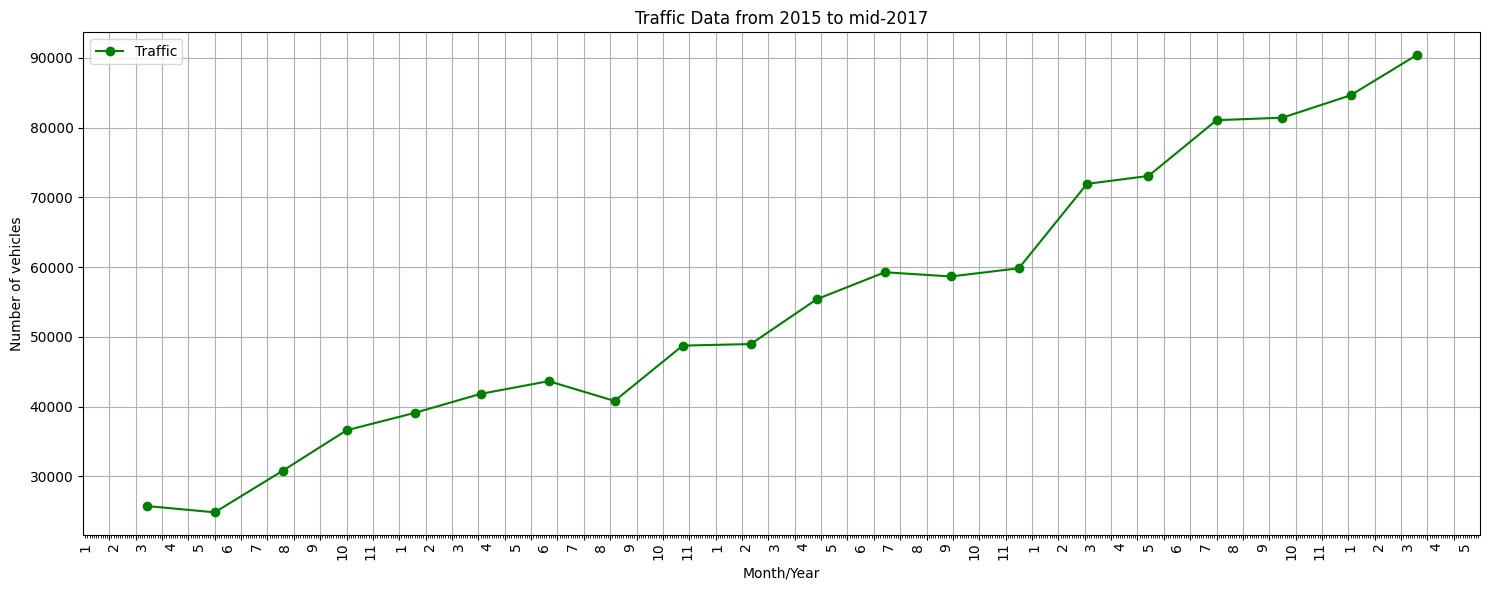

In [113]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming your DataFrame is named 'traffic_vis'
traffic_viz['DateTime'] = pd.to_datetime(traffic_viz['DateTime'], format='%Y-%m-%d %H:%M:%S')

# Filter data for the years 2015, 2016, and until 6/30/2017 11:00:00 PM
end_date = pd.to_datetime('6/30/2017 23:59:59')
filtered_data = traffic_viz[(traffic_viz['DateTime'] >= '2015-01-01') & (traffic_viz['DateTime'] <= end_date)]

# Recreate the monthly data as per the original steps
monthly_data = filtered_data.set_index('DateTime').resample('M').sum()

# Plotting with only the year at the start and 12 months within each year
fig, ax = plt.subplots(figsize=(15, 6))

ax.plot(monthly_data.index, monthly_data['Vehicles'], color='green', marker='o', linestyle='-', label='Traffic')

# Adding labels and title
ax.set_xlabel('Month/Year')
ax.set_ylabel('Number of vehicles')
ax.set_title('Traffic Data from 2015 to mid-2017')

# Displaying the legend
ax.legend()

# Displaying the grid
ax.grid(True)

# Customizing x-axis ticks to represent months and years appropriately
# Set major ticks to the first month of each year (January) to display the year
ax.xaxis.set_major_locator(plt.MultipleLocator(12))
ax.xaxis.set_major_formatter(plt.FuncFormatter(lambda x, pos: str(int(x/12) + 2015)))

# Set minor ticks to months
ax.xaxis.set_minor_locator(plt.MultipleLocator(1))
ax.xaxis.set_minor_formatter(plt.FuncFormatter(lambda x, pos: str(int(x % 12)) if int(x % 12) != 0 else '12'))

# Hide the major tick labels (years) and only show the minor tick labels (months)
plt.setp(ax.xaxis.get_majorticklabels(), visible=False)
plt.setp(ax.xaxis.get_minorticklabels(), rotation=90)

# Ensure that each month is labeled with the corresponding month number
ticks = ax.xaxis.get_minor_ticks()
for i in range(len(ticks)):
    if i % 12 != 0:  # This will hide every label that is not January (which are the major ticks)
        ticks[i].label1.set_visible(False)

plt.tight_layout()
plt.show()




In [134]:
import seaborn as sns
traffic_viz["Year"]= traffic_viz['DateTime'].dt.year
traffic_viz["month"]= traffic_viz['DateTime'].dt.month
traffic_viz["Day"]= traffic_viz.DateTime.dt.strftime("%A")
traffic_viz["hour"]= traffic_viz['DateTime'].dt.hour

In [135]:
traffic_viz.head()
traffic_viz.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48120 entries, 0 to 48119
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   DateTime  48120 non-null  datetime64[ns]
 1   Junction  48120 non-null  int64         
 2   Vehicles  48120 non-null  int64         
 3   ID        48120 non-null  int64         
 4   Year      48120 non-null  int64         
 5   month     48120 non-null  int64         
 6   day       48120 non-null  int64         
 7   hour      48120 non-null  int64         
 8   Day       48120 non-null  object        
dtypes: datetime64[ns](1), int64(7), object(1)
memory usage: 3.3+ MB


Text(0.5, 0, 'Date')

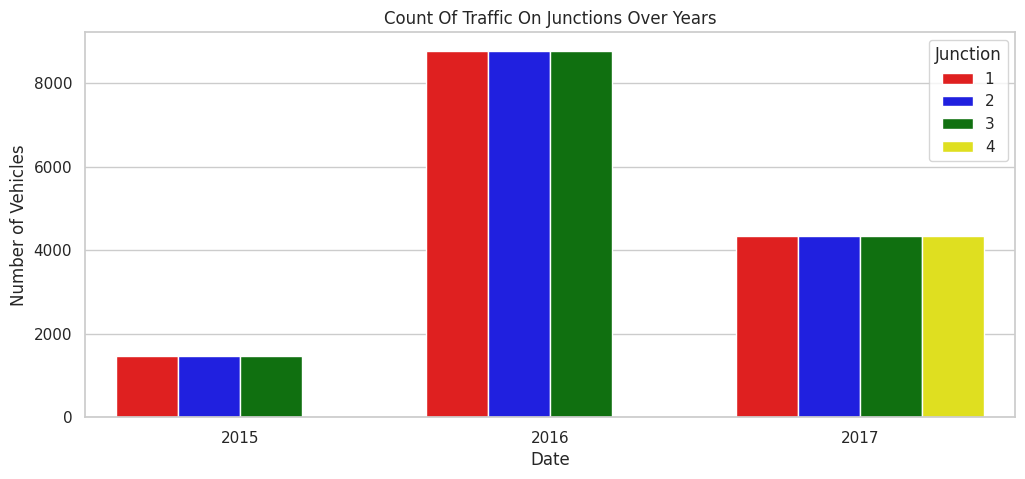

In [140]:

plt.figure(figsize=(12,5))
colors = ['red', 'blue', 'green', 'yellow']
count = sns.countplot(data=traffic_viz, x=traffic_viz["Year"], hue="Junction" , palette = colors)
count.set_title("Count Of Traffic On Junctions Over Years")
count.set_ylabel("Number of Vehicles")
count.set_xlabel("Date")


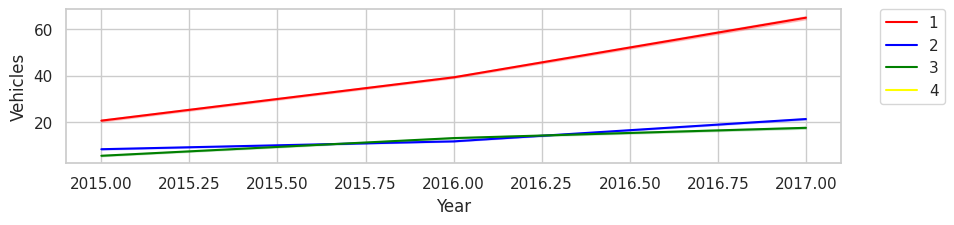

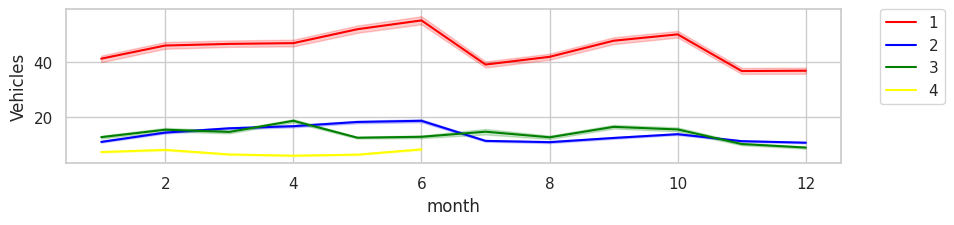

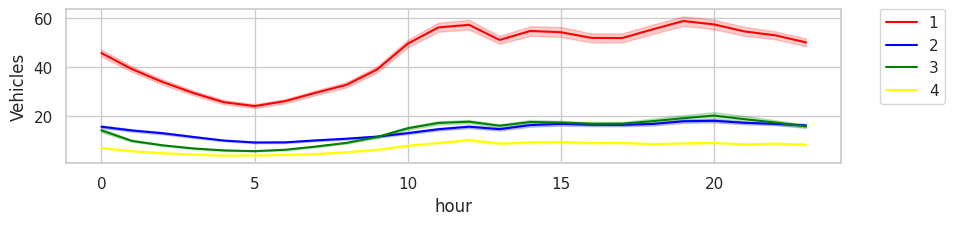

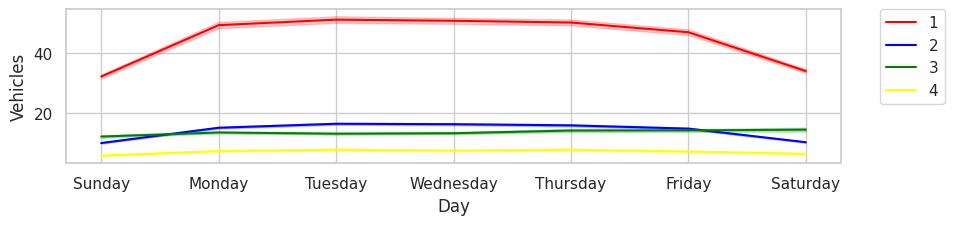

In [141]:
new_features = [ "Year","month","hour", "Day"]
colors = ['red', 'blue', 'green', 'yellow']
for i in new_features:
    plt.figure(figsize=(10,2))
    ax=sns.lineplot(x=traffic_viz[i],y="Vehicles",data=traffic_viz, hue="Junction" ,palette = colors)
    plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

*Interpretation*

*   **diagram 1 ( YEAR )** : The traffic data analysis over the years indicates that the 1st junction consistently experiences higher traffic compared to other junctions.junction and will have more vehicles circled in the future.
*  **Diagram 2 ( MONTHS )** : Examining the monthly trends reveals that the 1st junction is particularly congested during the summer season.
*    **Diagram 3 ( Hour )** :  The analysis of hourly traffic patterns shows that the 1st junction experiences higher congestion in the afternoons and evenings.
*   **Diagram 4 ( DAY )** : On weekends, there is a noticeable decrease in the number of vehicles at the junctions.






<ipython-input-143-78632cc471f7>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = traffic_viz.corr()


<Axes: >

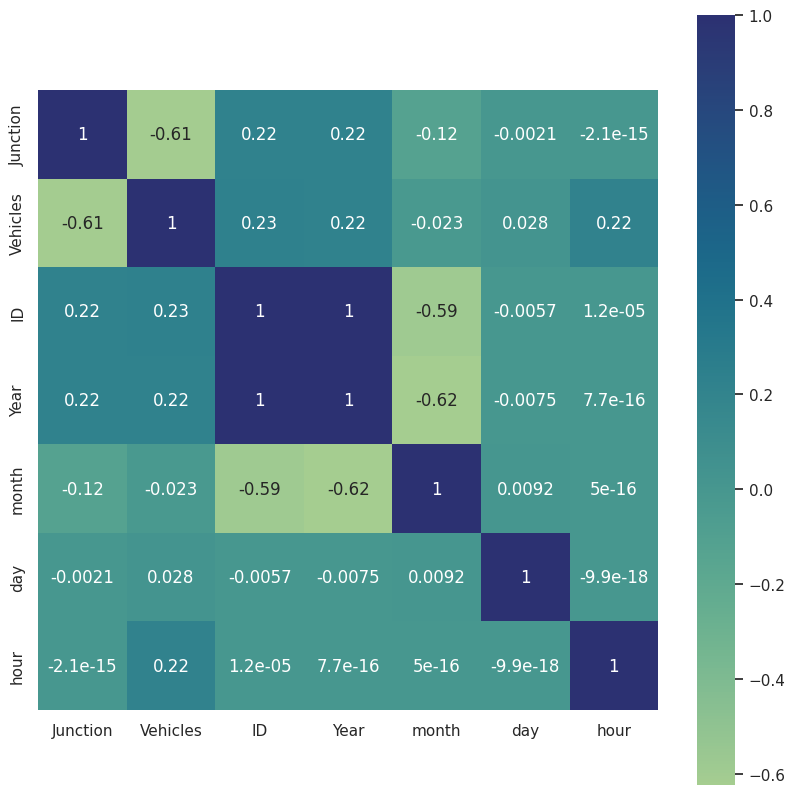

In [143]:
correlation_matrix = traffic_viz.corr()
plt.subplots(figsize=(10,10))
sns.heatmap(correlation_matrix,cmap= "crest",annot=True,square=True, )

*interpretation* :The correlation matrix reveals valuable insights into the relationships between different variables. In particular, we observe a negative correlation between the '**Vehicles**' and '**Junction**' variables. This negative correlation indicates that as the number of vehicles increases, the junction number tends to decrease.

This information is crucial for traffic management strategies. Focusing on the 1st junction, where congestion is more pronounced, becomes a priority.

**Data Transformation And Preprocessing**


In [154]:
df_J = traffic_data.pivot(columns="Junction", index="DateTime")
df_J.drop('ID', axis=1)
df_J.describe()

Vehicles                                                     ID  \
Junction             1             2             3            4             1   
count     14592.000000  14592.000000  14592.000000  4344.000000  1.459200e+04   
mean         45.052906     14.253221     13.694010     7.251611  2.016260e+10   
std          23.008345      7.401307     10.436005     3.521455  5.779594e+06   
min           5.000000      1.000000      1.000000     1.000000  2.015110e+10   
25%          27.000000      9.000000      7.000000     5.000000  2.016038e+10   
50%          40.000000     13.000000     11.000000     7.000000  2.016083e+10   
75%          59.000000     17.000000     18.000000     9.000000  2.017013e+10   
max         156.000000     48.000000    180.000000    36.000000  2.017063e+10   

                                                    
Junction             2             3             4  
count     1.459200e+04  1.459200e+04  4.344000e+03  
mean      2.016260e+10  2.016260e+10  2.017037e+10  
std       5.779594e+06  5.779594e+06  1.712987e+05  
min       2.015110e+10  2.015110e+10  2.017010e+10  
25%       2.016038e+10  2.016038e+10  2.017022e+10  
50%       2.016083e+10  2.016083e+10  2.017040e+10  
75%       2.017013e+10  2.017013e+10  2.017052e+10  
max       2.017063e+10  2.017063e+10  2.017063e+10